# Es 07.1

a) Si richiede di stampare $5 \times 10^5$ risultati istantanei per misure di energia potenziale e pressione e di calcolarne l'autocorrelazione a partire dal codice di simulazione Monte Carlo per l'ensemble canonico. Per stamapare tali risultati ho dato come input di stampare $5\times10^5$ blocchi in cui veniva fatto un solo passo. Ho preferito agire così di modo da non appesantire il codice con un ulteriore ofstream che avrebbe potuto rallentare il tempo di simulazione (già di per sè molto lungo).

Si richiede di fornire questi dati per le tre fasi del sistema dai date dai seguenti parametri:
- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Una volta stampati i dati ho implementato sullo script di python una funzione di autocorrelazione. Si mostrano i risultati ottenuti:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

dataPS=np.loadtxt('07.1/output.epot.solid.0')
dataPL=np.loadtxt('07.1/output.epot.liquid.0')
dataPG=np.loadtxt('07.1/output.epot.gas.0')
dataS=np.loadtxt('07.1/output.pres.solid.0')
dataL=np.loadtxt('07.1/output.pres.liquid.0')
dataG=np.loadtxt('07.1/output.pres.gas.0')

vS=dataPS[:,1]
vL=dataPL[:,1]
vG=dataPG[:,1]
pS=dataS[:,1]
pL=dataL[:,1]
pG=dataG[:,1]

In [2]:
def autocorrelation(x):
    n=len(x)
    var=x.var()
    x=x-x.mean()
    r=np.correlate(x,x,mode='full')[-n:]
    result=r/(var*n)
    return result

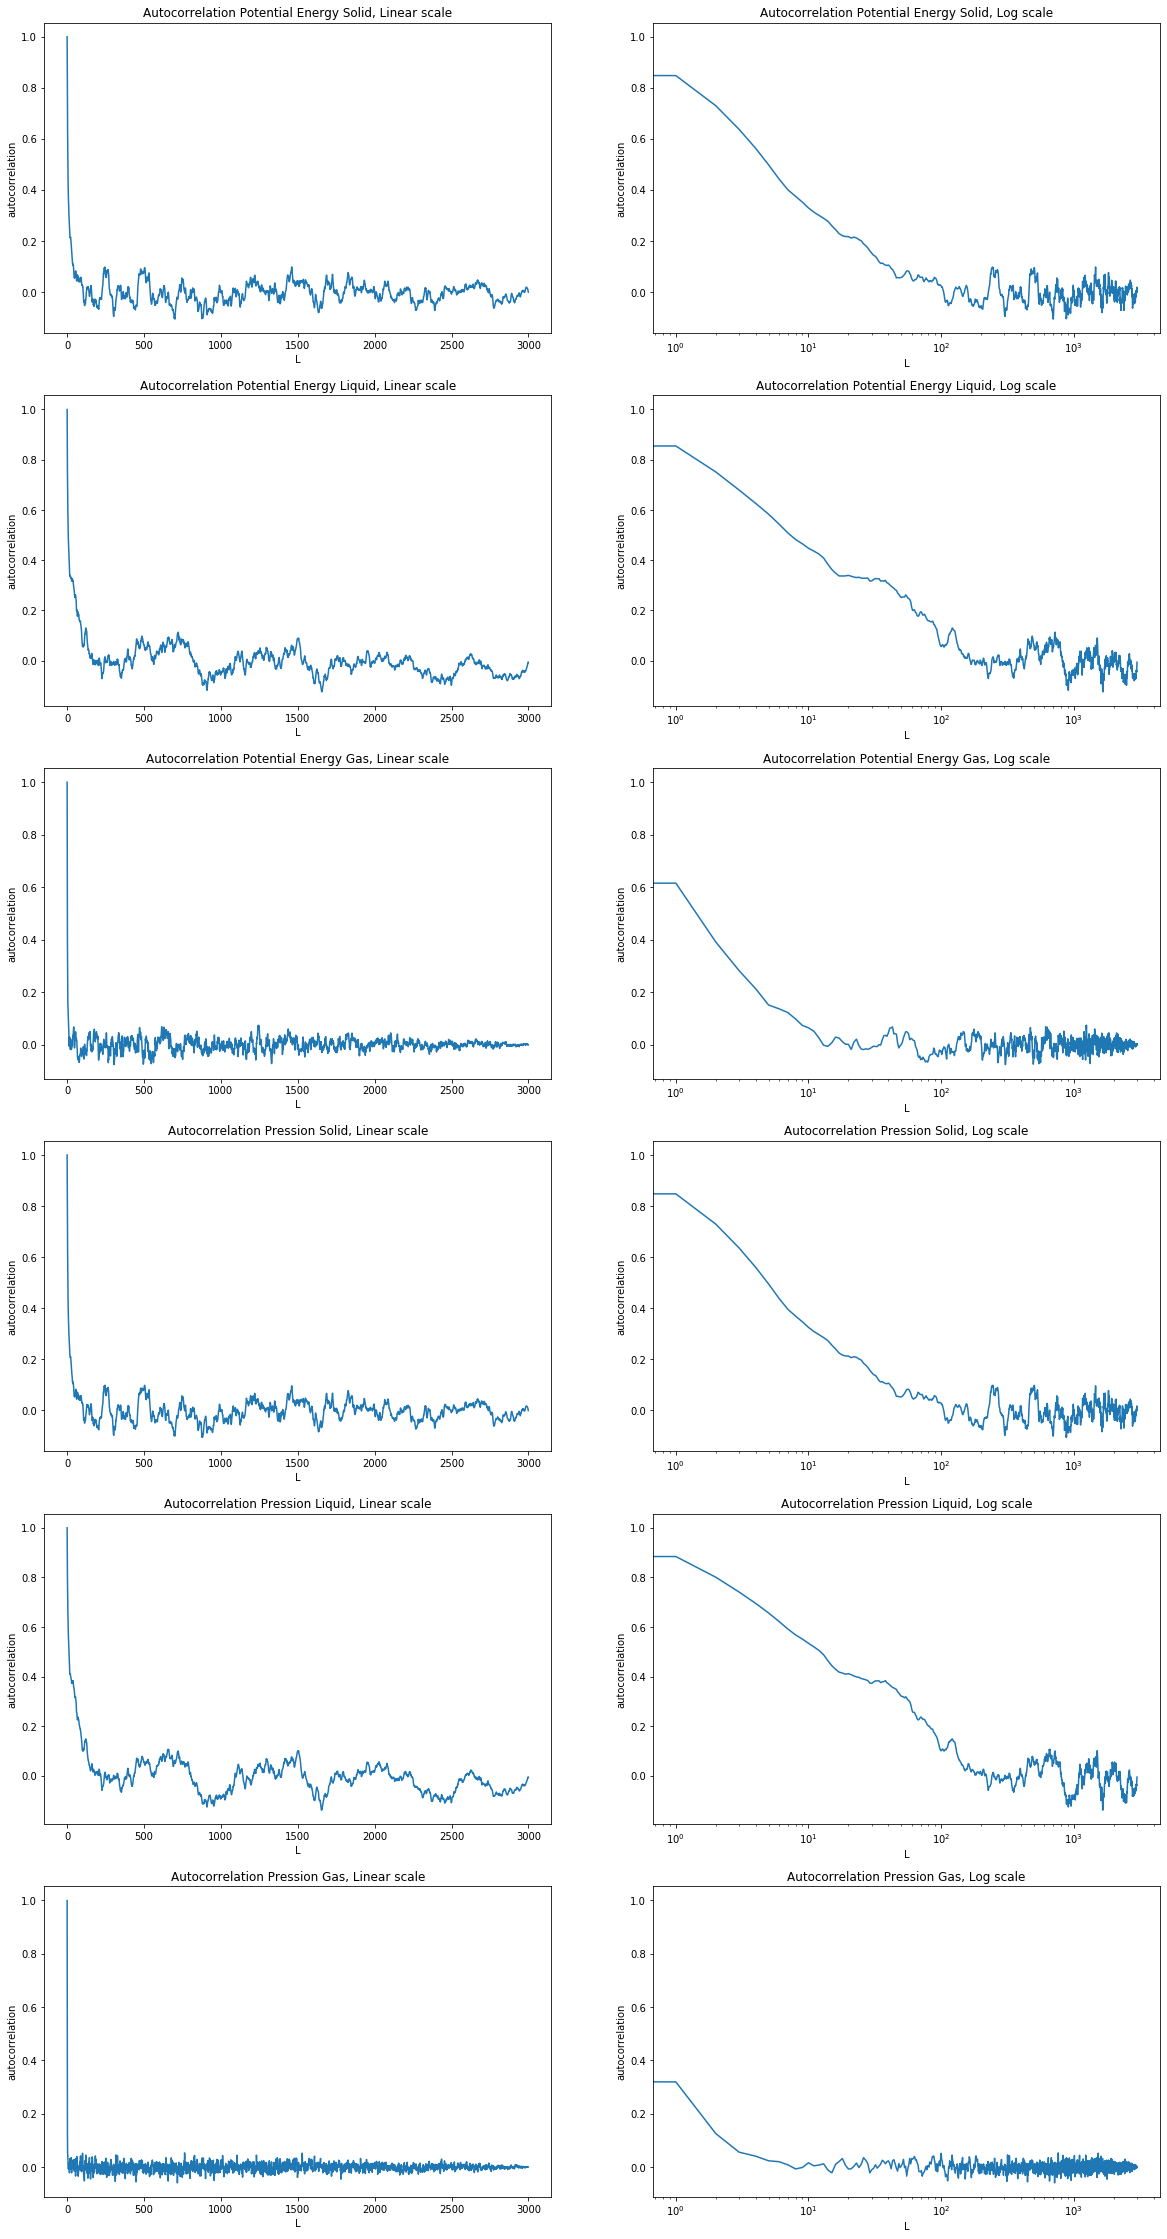

In [3]:
appoS=vS[0:3000]
appoL=vL[0:3000]
appoG=vG[0:3000]
appopS=pS[0:3000]
appopL=pL[0:3000]
appopG=pG[0:3000]

ac_s_v=autocorrelation(appoS)
ac_l_v=autocorrelation(appoL)
ac_g_v=autocorrelation(appoG)
ac_s_p=autocorrelation(appopS)
ac_l_p=autocorrelation(appopL)
ac_g_p=autocorrelation(appopG)
figure, axes = plt.subplots(nrows=6, ncols=2,figsize=(20,40))

axes[0,0].plot(ac_s_v)
axes[0,1].plot(ac_s_v)
axes[1,0].plot(ac_l_v)
axes[1,1].plot(ac_l_v)
axes[2,0].plot(ac_g_v)
axes[2,1].plot(ac_g_v)
axes[3,0].plot(ac_s_p)
axes[3,1].plot(ac_s_p)
axes[4,0].plot(ac_l_p)
axes[4,1].plot(ac_l_p)
axes[5,0].plot(ac_g_p)
axes[5,1].plot(ac_g_p)

axes[0,1].set_xscale('log')
axes[1,1].set_xscale('log')
axes[2,1].set_xscale('log')
axes[3,1].set_xscale('log')
axes[4,1].set_xscale('log')
axes[5,1].set_xscale('log')

axes[0,0].set_title('Autocorrelation Potential Energy Solid, Linear scale')
axes[0,1].set_title('Autocorrelation Potential Energy Solid, Log scale')
axes[1,0].set_title('Autocorrelation Potential Energy Liquid, Linear scale')
axes[1,1].set_title('Autocorrelation Potential Energy Liquid, Log scale')
axes[2,0].set_title('Autocorrelation Potential Energy Gas, Linear scale')
axes[2,1].set_title('Autocorrelation Potential Energy Gas, Log scale')
axes[3,0].set_title('Autocorrelation Pression Solid, Linear scale')
axes[3,1].set_title('Autocorrelation Pression Solid, Log scale')
axes[4,0].set_title('Autocorrelation Pression Liquid, Linear scale')
axes[4,1].set_title('Autocorrelation Pression Liquid, Log scale')
axes[5,0].set_title('Autocorrelation Pression Gas, Linear scale')
axes[5,1].set_title('Autocorrelation Pression Gas, Log scale')

for ax in axes.flat:
    ax.set(xlabel='L', ylabel='autocorrelation')

plt.show()

Per il caclolo dell'autocorrelazione ho preferito lavorare con meno dati rispetto ai $5\times10^5$ in quanto il tempo di processazione era molto elevato. Pertanto ho definito dei vettori di appoggio che contenessero meno dati da processare.

Tale scelta è giustificata dal fatto che già a una distanza di 200 step si perde correlazione tra i dati come si può apprezzare meglio nel plot logaritmico. 

Inoltre si notano differenze tra le perdite di correlazioni tra le varie fasi (infatti per quello che riguarda la fase gassosa perdo la correlazione già dopo 10 step) ma non si nota differenza tra le misure di energia potenziale e pressione, infatti, parlando della fase solida e liquida, in entrambi i casi ho perdita di correlazione dopo circa 200 step.

b) Si richiede, a partire dagli stessi dati, di calcolare il valore dell'incertezza al variare della lunghezza dei blocchi di misura.

In [12]:
L=np.array([10,20,50,100,200,500,750,1000,1250,1750,2000,2500,3000,3500,4000,5000])
N=500000/L

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)
    
def incertezza(L,N,data):
    err_prog = np.zeros(len(L))   
    for p in range (len(L)):
        ave = np.zeros(int(N[p]))
        av2 = np.zeros(int(N[p]))
        sum_prog=0
        su2_prog=0
        for i in range(int(N[p])):
            sum = 0
            for j in range(int(L[p])):
                k = j+i*int(L[p])
                sum += data[int(k)]
            ave[i] = sum/int(L[p])       # r_i 
            av2[i] = (ave[i])**2 # (r_i)^2         
        for j in range(int(N[p])):
            sum_prog += ave[j] # SUM_{j=0,i} r_j
            su2_prog += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog/=int(N[p]) # Cumulative average
        su2_prog/=int(N[p]) # Cumulative square average
        err_prog[p] = error(sum_prog,su2_prog,int(N[p])) # Statistical uncertainty
    return err_prog

In [13]:
errvS=incertezza(L,N,vS)
errvL=incertezza(L,N,vL)
errvG=incertezza(L,N,vG)
errpS=incertezza(L,N,pS)
errpL=incertezza(L,N,pL)
errpG=incertezza(L,N,pG)

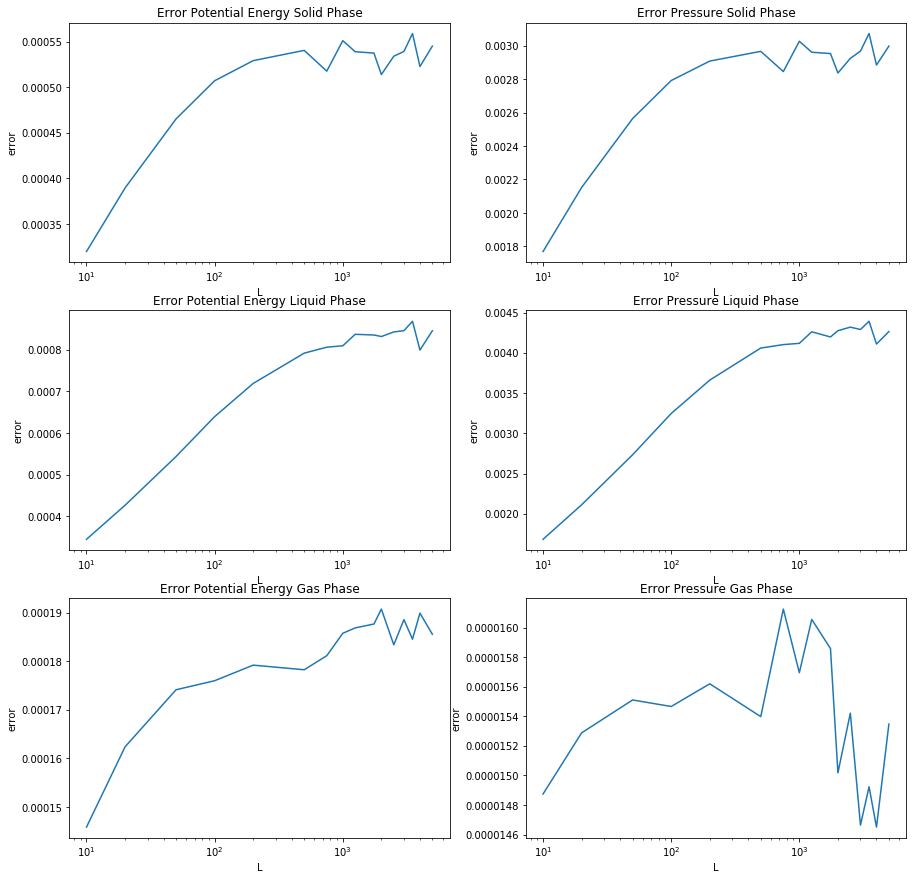

In [14]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

axes[0,0].plot(L,errvS)
axes[1,0].plot(L,errvL)
axes[2,0].plot(L,errvG)
axes[0,1].plot(L,errpS)
axes[1,1].plot(L,errpL)
axes[2,1].plot(L,errpG)

axes[0,0].set_title('Error Potential Energy Solid Phase')
axes[1,0].set_title('Error Potential Energy Liquid Phase')
axes[2,0].set_title('Error Potential Energy Gas Phase')
axes[0,1].set_title('Error Pressure Solid Phase')
axes[1,1].set_title('Error Pressure Liquid Phase')
axes[2,1].set_title('Error Pressure Gas Phase')

for ax in axes.flat:
    ax.set(xscale='log',xlabel='L',ylabel='error')

Si nota che una l'errore tende a saturare una volta che si supera 200 step di lunghezza circa.

Pertanto per le prossime simulazioni verranno presi in esame blocchi di lunghezza di 200 step di modo da avere un errore che non dipenda dalla grandezza del blocco e non avere correlazione. Per quanto riguarda invece la fase gassosa ho preferito agire come per le altre due fasi e quindi agire comuqnue su 200 step in quanto l'errore va saturandosi a quella distanza.

# Es 07.2

Si richiede di implementare il calcolo della funzione di distribuzione radiale g(r) per il singolo blocco (output.gofr.0) e la media finale tra i blocchi per g(r). 

Piccola osservazione sull'output.gofr.0, in quest'ultimo è stato stampato nella prima colonna il numero del blocco e nelle restanti l'istogramma, sprovvisto di asse x.

Si riporta qui sotto un esempio ottenuto a seguito di una simulazione con 10 blocchi con 200 step in ognuno per una fase solida, l'output è tratto dal file output.gave.0:

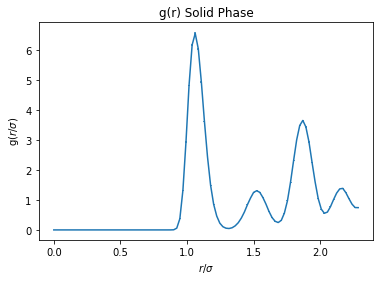

In [7]:
g=np.loadtxt('07.2/2_output.gave.0')
x=g[:,0]
y=g[:,1]
err=g[:,2]

plt.errorbar(x,y,yerr=err)
plt.xlabel('$r/ \sigma$')
plt.ylabel('g($r/ \sigma$)')
plt.title('g(r) Solid Phase')
plt.show()

# Es 07.3

Si richiede di implementare l'algoritmo di **g(r)** per il codice di dinamica molecolare visto nella esercitazione 4. Tale metodo è stato implementato e verrà discusso nell'**Esercizio 7.4**.

# Es 07.4

Si richiede di calcolare per una molecola di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) i valori di energia potenziale per particella, pressione e la distribuzione radiale espressi coi valori del SI per le 3 fasi espresse coi seguenti parametri:

1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. fase liquida $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

e si richiede di confrontarle con quelle ottenute nell'esercitazione 4 ottenute a partire da una stessa configurazione stabile di partenza (ovviamente per la simulazione dell'es.4 è stato necessario fornire anche una configurazione "pre-iniziale").

In [8]:
uS7=np.loadtxt('07.4/7.4_7output.epot.solid.0')
pS7=np.loadtxt('07.4/7.4_7output.pres.solid.0')
gS7=np.loadtxt('07.4/7.4_7output.gave.solid.0')
uS4=np.loadtxt('07.4/7.4_4output.epot.solid.0')
pS4=np.loadtxt('07.4/7.4_4output.pres.solid.0')
gS4=np.loadtxt('07.4/7.4_4output.gave.solid.0')

uL7=np.loadtxt('07.4/7.4_7output.epot.liquid.0')
pL7=np.loadtxt('07.4/7.4_7output.pres.liquid.0')
gL7=np.loadtxt('07.4/7.4_7output.gave.liquid.0')
uL4=np.loadtxt('07.4/7.4_4output.epot.liquid.0')
pL4=np.loadtxt('07.4/7.4_4output.pres.liquid.0')
gL4=np.loadtxt('07.4/7.4_4output.gave.liquid.0')

uG7=np.loadtxt('07.4/7.4_7output.epot.gas.0')
pG7=np.loadtxt('07.4/7.4_7output.pres.gas.0')
gG7=np.loadtxt('07.4/7.4_7output.gave.gas.0')
uG4=np.loadtxt('07.4/7.4_4output.epot.gas.0')
pG4=np.loadtxt('07.4/7.4_4output.pres.gas.0')
gG4=np.loadtxt('07.4/7.4_4output.gave.gas.0')

esukb=120
sig=0.34*10**-9
e=esukb*1.38*10**-23

convp=e/(sig**3)

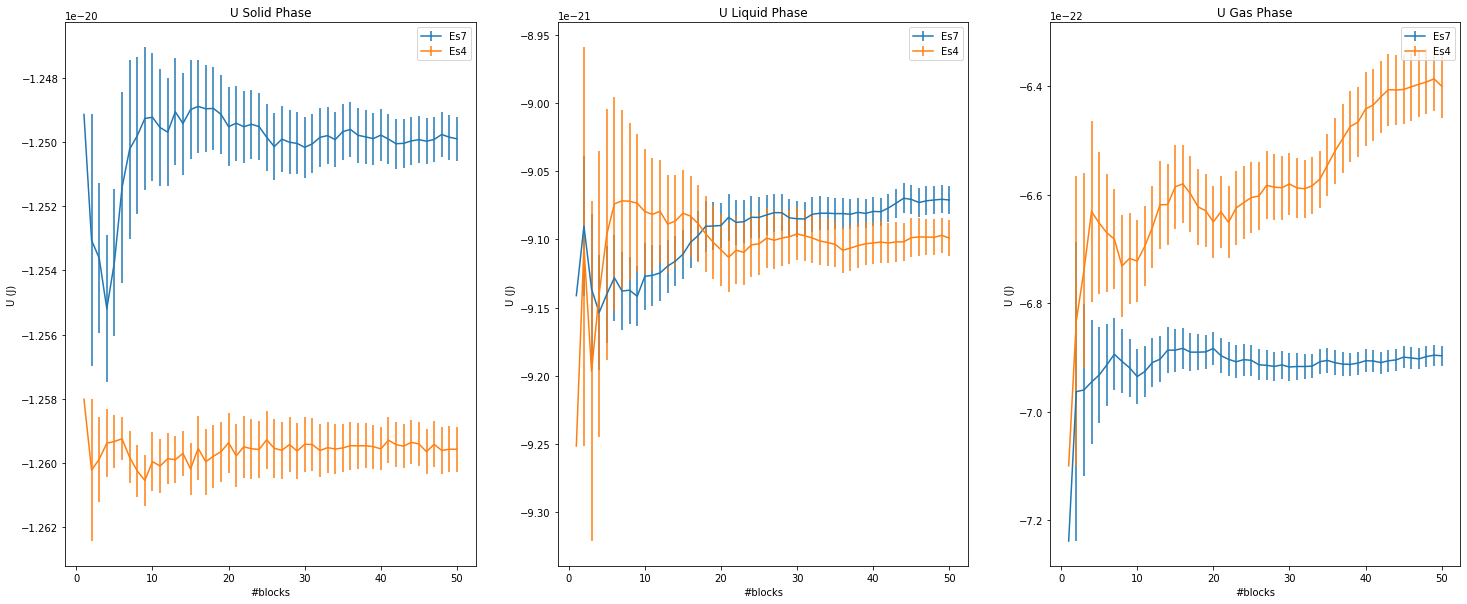

In [9]:
figure, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,10))

axes[0].errorbar(uS7[:,0],uS7[:,2]*e,yerr=uS7[:,3]*e,label=('Es7'))
axes[0].errorbar(uS4[:,0],uS4[:,2]*e,yerr=uS4[:,3]*e,label=('Es4'))
axes[0].legend()
axes[1].errorbar(uL7[:,0],uL7[:,2]*e,yerr=uL7[:,3]*e,label=('Es7'))
axes[1].errorbar(uL4[:,0],uL4[:,2]*e,yerr=uL4[:,3]*e,label=('Es4'))
axes[1].legend()
axes[2].errorbar(uG7[:,0],uG7[:,2]*e,yerr=uG7[:,3]*e,label=('Es7'))
axes[2].errorbar(uG4[:,0],uG4[:,2]*e,yerr=uG4[:,3]*e,label=('Es4'))
axes[2].legend()

axes[0].set_title('U Solid Phase')
axes[1].set_title('U Liquid Phase')
axes[2].set_title('U Gas Phase')
for ax in axes.flat:
    ax.set(xlabel='#blocks',ylabel='U (J)')
plt.show()

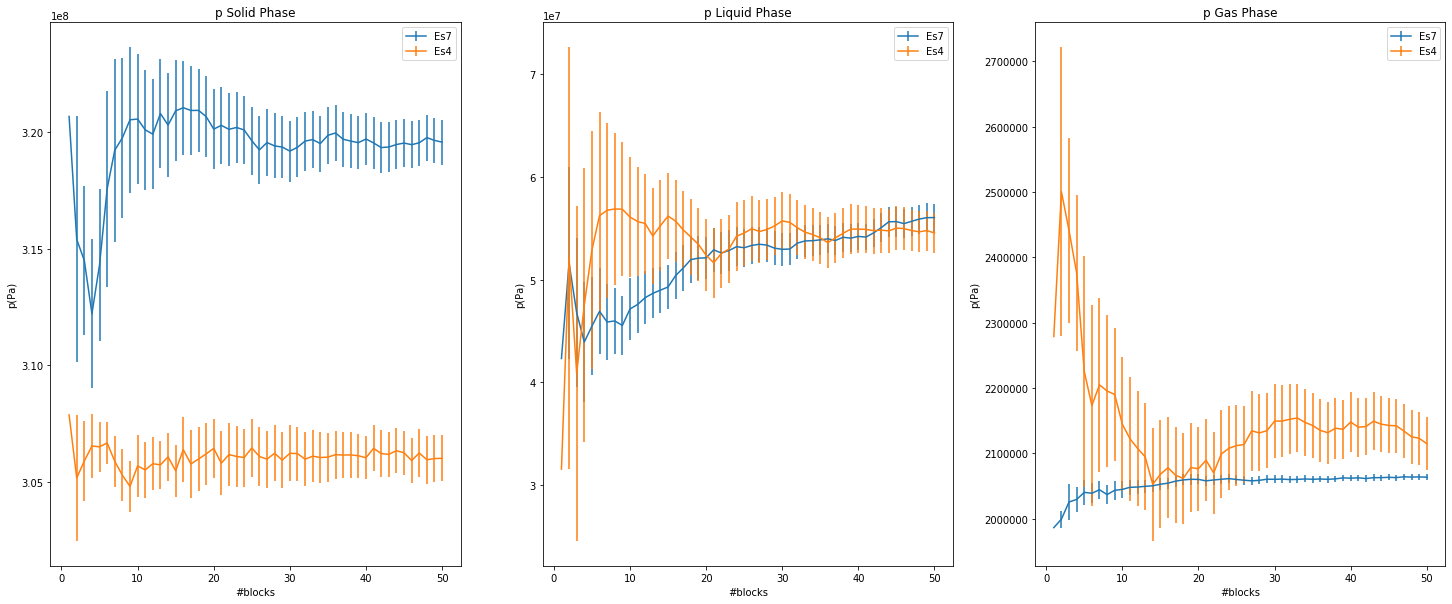

In [10]:
figure, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,10))


axes[0].errorbar(pS7[:,0],pS7[:,2]*convp,yerr=pS7[:,3]*convp,label=('Es7'))
axes[0].errorbar(pS4[:,0],pS4[:,2]*convp,yerr=pS4[:,3]*convp,label=('Es4'))
axes[0].legend()
axes[1].errorbar(pL7[:,0],pL7[:,2]*convp,yerr=pL7[:,3]*convp,label=('Es7'))
axes[1].errorbar(pL4[:,0],pL4[:,2]*convp,yerr=pL4[:,3]*convp,label=('Es4'))
axes[1].legend()
axes[2].errorbar(pG7[:,0],pG7[:,2]*convp,yerr=pG7[:,3]*convp,label=('Es7'))
axes[2].errorbar(pG4[:,0],pG4[:,2]*convp,yerr=pG4[:,3]*convp,label=('Es4'))
axes[2].legend()
axes[0].set_title('p Solid Phase')
axes[1].set_title('p Liquid Phase')
axes[2].set_title('p Gas Phase')

for ax in axes.flat:
    ax.set(xlabel='#blocks',ylabel='p(Pa)')
    
plt.show()

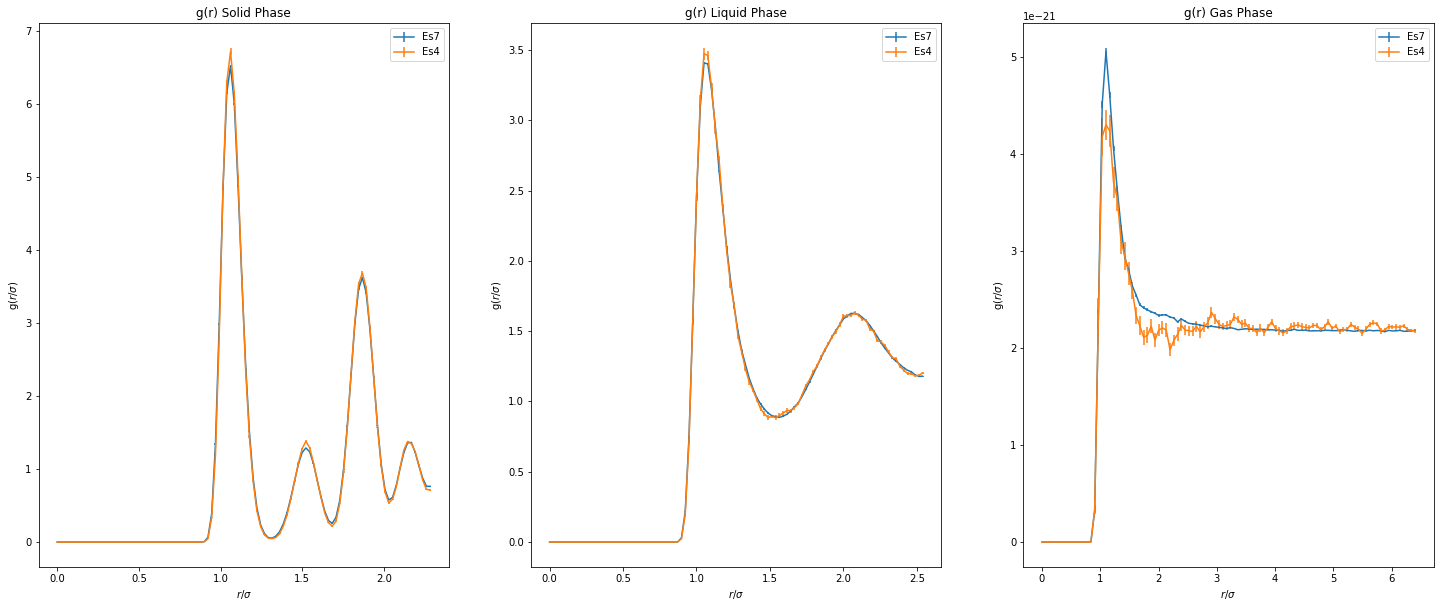

In [11]:
figure, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,10))


axes[0].errorbar(gS7[:,0],gS7[:,1],yerr=gS7[:,2],label=('Es7'))
axes[0].errorbar(gS4[:,0],gS4[:,1],yerr=gS4[:,2],label=('Es4'))
axes[0].legend()
axes[1].errorbar(gL7[:,0],gL7[:,1],yerr=gL7[:,2],label=('Es7'))
axes[1].errorbar(gL4[:,0],gL4[:,1],yerr=gL4[:,2],label=('Es4'))
axes[1].legend()
axes[2].errorbar(gG7[:,0],gG7[:,1]*e,yerr=gG7[:,2]*e,label=('Es7'))
axes[2].errorbar(gG4[:,0],gG4[:,1]*e,yerr=gG4[:,2]*e,label=('Es4'))
axes[2].legend()

axes[0].set_title('g(r) Solid Phase')
axes[1].set_title('g(r) Liquid Phase')
axes[2].set_title('g(r) Gas Phase')

for ax in axes.flat:
    ax.set(xlabel='$r/\sigma$',ylabel='g($r/\sigma$)')

plt.show()

Per quanto riguarda $g(r)$ essa risulta uguale calcolata in entrambi i modi per tutte e tre le fasi, per quanto rigurada $U$ e $p$ invece, poichè sono proprietà che dipendono dalla termodinamica, ha senso che vengano dei risultati leggermente diversi tra le due simulazioni, questo può essere giustificato dal fatto che i due metodi agiscano su due ensemble diversi (microcanonico per quanto riguarda l'algoritmo di Dinamica Molecolare, canonico per il metodo Monte Carlo).